In [ ]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd


In [13]:
nums = ['100', '200', '300', '400', '500', '600', '700', '800', '900']
#urls = url__link_test_list 
urls = []
for i in nums:
    general_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100&firstRecord=' + i)
    page = requests.get(general_url).text
    soup = bs(page)
    for general_url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
        general_url_link = general_url.find('a')['href']
        urls.append(general_url_link)
        
        


In [14]:
nums = ['100', '200', '300', '400', '500', '600', '700', '800']
#urls = url__link_test_list 
for i in nums:
    general_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceDESC&numRecords=100&firstRecord=' + i)
    page = requests.get(general_url).text
    soup = bs(page)
    for general_url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
        general_url_link = general_url.find('a')['href']
        urls.append(general_url_link)
        
        


In [18]:
len(urls)

1700

In [20]:
#testing html to find more features
links = 'https://kbb.com'+urls[1]
individual_page = requests.get(links).text
individual_soup = bs(individual_page)

In [32]:
#print(individual_soup.find('h1').text.split()[0])
#year = 2022 - int(individual_soup.find('h1').text.split()[1])
print(individual_soup.find('h1').text.split()[2])
#print(year)

Chevrolet


In [ ]:
#code scaled to first 1000 trucks

import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd






#base_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10' +
#            '&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100')
#page = requests.get(base_url).text
#soup = bs(page)
#url__link_test_list = []

#for url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
 #   url_link = url.find('a')['href']
  #  url__link_test_list.append(url_link)

#url__link_test_list


######################################################################################################
mvp_car_dict_list = []

for i in range(0,1700):
    try:
        links = 'https://kbb.com'+urls[i]
        individual_page = requests.get(links).text
        individual_soup = bs(individual_page)
        individual_data = []


        car1_info = []
        car1_dict_list = []

        for item in individual_soup.find_all(class_="list-bordered list-condensed"):
        #thing1 = item.find('aria-label')
            thing2 = item.find(class_ = 'col-xs-10 margin-bottom-0').text
            car1_info.append(thing2)
            
        #print(thing2)
    
        car1_info
        
        #mvp_car_dict_list = []

        mileage = car1_info[0].split()[0]
        ext_color = car1_info[1]
        int_color = car1_info[2]
        engine_size = car1_info[3].split()[0]
        num_of_cylinders = car1_info[3].split()[1].split('-')[0]
        trans_type = ''
        price1 = individual_soup.find(class_ = 'first-price').text
        condition = individual_soup.find('h1').text.split()[0] #new or used
        years_old = 2022 - int(individual_soup.find('h1').text.split()[1])
        make = individual_soup.find('h1').text.split()[2]

        
        if 'Automatic' in car1_info[4]:
            trans_type = 'Automatic'
        else:
            trans_type = 'Manual'
        awd = ''
        if '2' in car1_info[5]:
            awd = 'no'
        elif 'two' in car1_info[5]:
            awd = 'no'
        elif 'Two' in car1_info[5]:
            awd = 'no'
        else:
            awd = 'yes'
        mvp_car_dict_list.append({'mileage': mileage, 'ext_color': ext_color, 'int_color': int_color, 'engine_size': engine_size, 'cylinders': num_of_cylinders, 'transmission': trans_type, 'awd': awd, 'price': price1, 'make': make, 'age': years_old, 'condition': condition})

        mvp_car_dict_list
    except:
        print('error at ' +str(i))

In [37]:
len(mvp_car_dict_list)

1268

In [38]:
big_df = pd.DataFrame(mvp_car_dict_list)
big_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price,make,age,condition
0,"105,410",White Exterior,Gray Interior,5.7L,8,Automatic,no,"18,588",RAM,8,Used
1,"115,000",Summit White Exterior,Ebony Leather Seats,5.3L,8,Automatic,no,"18,788",Chevrolet,11,Used
2,"147,134",Silver Exterior,4.0L 6-Cylinder Gas Engine,5-Speed,Automatic,Manual,no,"18,950",Toyota,10,Used
3,"128,976",Slate Metallic Exterior,Graphite Interior,5.7L,8,Automatic,no,"18,990",Toyota,14,Used
4,"88,150",Silver Exterior,Grey Interior,3.4L,6,Automatic,no,"18,995",Toyota,20,Used
...,...,...,...,...,...,...,...,...,...,...,...
1263,"13,157",Barcelona Red Metallic Exterior,Black Interior,3.5L,6,Automatic,no,"43,641",Toyota,2,Used
1264,"68,078",Magnetic Metallic Exterior,Medium Earth Gray Interior,3.5L,6,Automatic,yes,"43,599",Ford,2,Used
1265,"49,850",Silver Ice Metallic Exterior,Black Interior,5.3L,8,Automatic,no,"43,549",Chevrolet,3,Used
1266,"25,856",Super White Exterior,Cement Interior,3.5L,6,Automatic,yes,"43,494",Toyota,2,Used


In [ ]:
big_df = big_df.loc[((big_df['cylinders'] == '4') | (big_df['cylinders'] == '6') | (big_df['cylinders'] == '8'))]
big_df

In [46]:
big_df['condition'].unique()  #all columns that have categorical values look clean

array(['Used', 'Certified', 'New'], dtype=object)

In [ ]:
big_df = big_df.replace(',','', regex=True) #cleaning numeric columns to prepare them
big_df

In [54]:
big_df['price'] = big_df['price'].replace('MSRP', '', regex=True) #some values had MSRP in the price

In [55]:
big_df['engine_size'] = big_df['engine_size'].replace('L', '', regex=True)
big_df['price'] = big_df['price'].astype(int)
big_df['mileage'] = big_df['mileage'].astype(int)
big_df['engine_size'] = big_df['engine_size'].astype(float)
big_df['cylinders'] = big_df['cylinders'].astype(int)

In [ ]:
big_df.dtypes #checking data types of the df

In [57]:
paint_count = big_df['ext_color'].value_counts()
paint_count

Summit White Exterior              134
Black Exterior                      99
Bright White Clearcoat Exterior     79
White Exterior                      47
Oxford White Exterior               47
                                  ... 
"Black" Exterior                     1
Lunar Rock Exterior                  1
Grey Exterior                        1
Fairway Metallic Exterior            1
Cactus Gray Exterior                 1
Name: ext_color, Length: 160, dtype: int64

In [58]:
#filtering some of the colors

big_df['ext_color'] = big_df['ext_color'].replace('Magnetic Gray Metallic Exterior','Gray Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Dark Shadow Gray Metallic Exterior','Gray Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Charcoal Exterior','Gray Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Stealth Gray Metallic Exterior','Gray Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Oxford White Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Super White Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Summit White Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Glacier White Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Oxford White (Cc) Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Taffeta White Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('White Diamond Tricoat Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Super Black Exterior','Black Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Spruce Mica Exterior','Green Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Grern Exterior','Green Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Bright Red Exterior','Red Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Toreador Red Metallic Exterior','Red Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Mystic Gold Metallic Exterior','Gold Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Atlantic Blue Pearl Exterior','Blue Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Brilliant Silver Exterior','Silver Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Radiant Silver Metallic Exterior','Silver Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Bright Silver Metallic Clear Coat Exterior','Silver Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Avalanche Exterior','White Exterior', regex=True)
big_df['ext_color'] = big_df['ext_color'].replace('Desert Sand Mica Exterior','Beige Exterior', regex=True)


In [61]:
paint_count = big_df['ext_color'].value_counts()
paint_count

other                                          468
White Exterior                                 294
Black Exterior                                 103
Bright White Clearcoat Exterior                 79
Gray Exterior                                   68
Diamond Black Crystal Pearlcoat Exterior        38
Granite Crystal Metallic Clearcoat Exterior     37
Satin Steel Metallic Exterior                   35
Silver Ice Metallic Exterior                    27
Silver Exterior                                 23
Onyx Black Exterior                             23
Billet Silver Metallic Clearcoat Exterior       21
Name: ext_color, dtype: int64

In [60]:
#bucketing the rest
other_colors = list(paint_count[paint_count <= 20].index)
big_df['ext_color'] = big_df['ext_color'].replace(other_colors, 'other')


In [71]:
interior_count = big_df['int_color'].value_counts()
interior_count

Black Interior    784
other             250
Gray Interior     182
Name: int_color, dtype: int64

In [64]:
#bucketing interiors
other_int_colors = list(interior_count[interior_count <=20].index)
big_df['int_color'] = big_df['int_color'].replace(other_int_colors, 'other')


In [70]:
#filtering some of the rest by hand
big_df['int_color'] = big_df['int_color'].replace('Steel Interior','Gray Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Graphite Interior','Gray Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Cement Interior','Gray Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Cement Gray Interior','Gray Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Medium Earth Gray Interior','Gray Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Black Leather Seats','Black Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Jet Black Leather Seats','Black Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Jet Black Cloth Seat Trim','Black Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Jet Black Interior','Black Interior', regex=True)
big_df['int_color'] = big_df['int_color'].replace('Diesel Gray/Black Interior','Black Interior', regex=True)


In [73]:
big_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price,make,age,condition
0,105410,White Exterior,Gray Interior,5.7,8,Automatic,no,18588,RAM,8,Used
1,115000,White Exterior,other,5.3,8,Automatic,no,18788,Chevrolet,11,Used
3,128976,other,Gray Interior,5.7,8,Automatic,no,18990,Toyota,14,Used
4,88150,Silver Exterior,other,3.4,6,Automatic,no,18995,Toyota,20,Used
5,112241,White Exterior,other,2.5,4,Automatic,yes,18995,Chevrolet,6,Used
...,...,...,...,...,...,...,...,...,...,...,...
1263,13157,other,Black Interior,3.5,6,Automatic,no,43641,Toyota,2,Used
1264,68078,other,Gray Interior,3.5,6,Automatic,yes,43599,Ford,2,Used
1265,49850,Silver Ice Metallic Exterior,Black Interior,5.3,8,Automatic,no,43549,Chevrolet,3,Used
1266,25856,White Exterior,Gray Interior,3.5,6,Automatic,yes,43494,Toyota,2,Used


In [92]:
#model #2 code #thank you to Heather Hardway for sharing her code for model #2, i am comparing her modeling method for model #2 to other models in the MVP file
from sklearn.linear_model import LinearRegression, Lasso, Ridge
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [93]:
X = pd.get_dummies(big_df[['mileage', 'ext_color', 'int_color', 'engine_size', 'cylinders', 'transmission', 'awd', 'make', 'age', 'condition']], drop_first=True)
y = big_df['price']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42) #splitting original data (X,y) into test data sets and train data sets


In [95]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111111, random_state=42) #splitting train data into train data and val data sets

In [96]:
X_train.shape[0]/X.shape[0]

0.7993421052631579

In [122]:
X_val.shape[0] / X.shape[0]

0.10032894736842106

In [123]:
X_test.shape[0] / X.shape[0]

0.10032894736842106

In [97]:
model2 = LinearRegression()   #running and fitting regression
model2.fit(X_train, y_train)

LinearRegression()

In [98]:
r2_score(y_train, model2.predict(X_train)) #checking r^2 for train data

0.6617416008744288

In [81]:
r2_score(y_val, model2.predict(X_val)) #checking r^2 for val data

0.6085983177367738

/Users/erikpaulson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

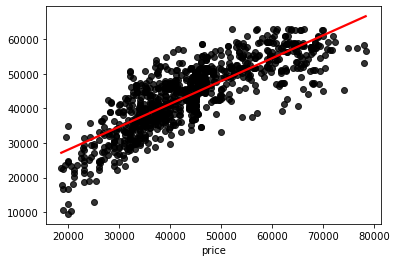

In [82]:
import seaborn as sns
#plot the acual results (y train) vs the predicted result(X_train)

sns.regplot(y_train, model2.predict(X_train), ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [83]:
eval_scores = pd.DataFrame(columns = ['train_r2', 'val_r2', 'test_r2'])
eval_scores.loc['base_model'] = [r2_score(y_train, model2.predict(X_train)), r2_score(y_val, model2.predict(X_val)), r2_score(y_test, model2.predict(X_test))]
eval_scores

,train_r2,val_r2,test_r2
base_model,0.661742,0.608598,0.64179


In [ ]:
#end of first model on big df

In [84]:
alphas = np.logspace(-4, 1, 20)

#For ridge/lasso, need to standardize features, this is building more models standardized by Lasso to compare to the base model 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    eval_scores.loc['lasso_'+str(a)] = [r2_score(y_train, model.predict(X_train)), r2_score(y_val, model.predict(X_val)),r2_score(y_test, model.predict(X_test))]

In [ ]:
eval_scores

In [ ]:
#comparing this to the smaller df with a few less features the r^2 is significantly improved. test_df r^2 = .313 big_df r^2 = .662

In [86]:
X.shape #has 29 features and 1216 rows

(1216, 29)

In [100]:
#be careful to not run the scalers on the lasso before running this or else r2 will be different
n = X_train.shape[0]
p = X_train.shape[1]

r2 = r2_score(y_train, model2.predict(X_train))


adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.6513281257421129

In [ ]:
#adjusted r2 for this model is .6513 compared to .2875 previously for test_df

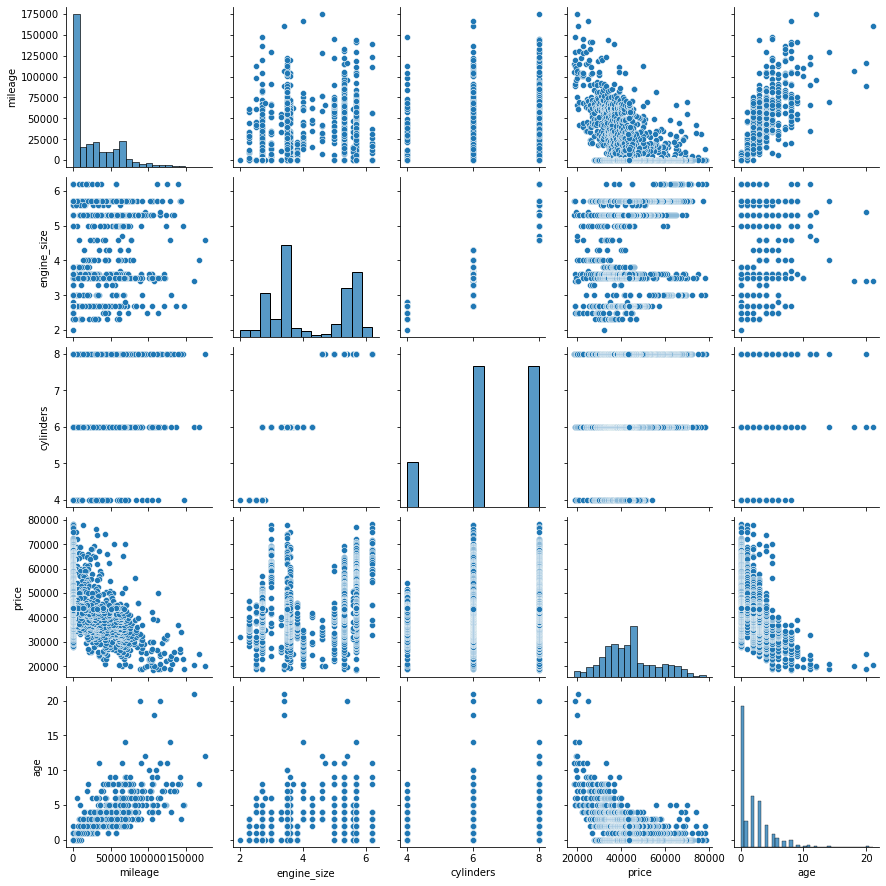

In [101]:
sns.pairplot(big_df)

In [111]:
model2.coef_ #values from coefficients 

array([-1.44062325e-01,  2.79899848e+02,  1.85973075e+03, -1.03558418e+03,
       -8.33384239e+02, -1.82942381e+03,  1.81863699e+03,  2.01119236e+03,
       -2.50089519e+03, -2.64342750e+03, -4.50893993e+03, -2.05165287e+03,
       -8.92922956e+02, -3.60039591e+03, -1.70512479e+03, -2.16322866e+03,
       -1.71962306e+03,  3.95221491e+03,  7.41998722e+03,  2.83028736e+03,
        2.08763686e+02, -6.80282589e+03, -1.05977108e+04,  9.60091419e+03,
       -6.42506208e+03,  9.18782259e+02,  1.01410741e+03, -1.12281094e+03,
       -2.54043440e+03])

In [103]:
model2.intercept_

37192.62415893281

In [104]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model2.predict(X_train), squared=False) #average error of the linear models price prediction

6925.765663052867

In [105]:
big_df['price'].mean() #average price of a truck in big_df

43993.43667763158

In [106]:
mean_squared_error(y_train, model2.predict(X_train), squared=False) / big_df['price'].mean()

0.157427247927968

In [ ]:
#even though the mean squared error rose compared to the test_df metric, the percentage error decreased.  This indicates that the new model is more accurately
#predicting the prices

In [107]:
X.columns.values

array(['mileage', 'engine_size', 'cylinders', 'age',
       'ext_color_Black Exterior',
       'ext_color_Bright White Clearcoat Exterior',
       'ext_color_Diamond Black Crystal Pearlcoat Exterior',
       'ext_color_Granite Crystal Metallic Clearcoat Exterior',
       'ext_color_Gray Exterior', 'ext_color_Onyx Black Exterior',
       'ext_color_Satin Steel Metallic Exterior',
       'ext_color_Silver Exterior',
       'ext_color_Silver Ice Metallic Exterior',
       'ext_color_White Exterior', 'ext_color_other',
       'int_color_Gray Interior', 'int_color_other',
       'transmission_Manual', 'awd_yes', 'make_Ford', 'make_GMC',
       'make_Honda', 'make_Hyundai', 'make_Jeep', 'make_Nissan',
       'make_RAM', 'make_Toyota', 'condition_New', 'condition_Used'],
      dtype=object)

In [118]:
#how each feature affects the cars price
feature_impacts = pd.DataFrame(data=model2.coef_)
feature_impacts['coefficient'] = X.columns.values
feature_impacts['intercept'] = model2.intercept_
feature_impacts

,0,coefficient,intercept
0,-0.144062,mileage,37192.624159
1,279.899848,engine_size,37192.624159
2,1859.730746,cylinders,37192.624159
3,-1035.584180,age,37192.624159
4,-833.384239,ext_color_Black Exterior,37192.624159
5,-1829.423808,ext_color_Bright White Clearcoat Exterior,37192.624159
6,1818.636989,ext_color_Diamond Black Crystal Pearlcoat Exte...,37192.624159
7,2011.192358,ext_color_Granite Crystal Metallic Clearcoat E...,37192.624159
8,-2500.895190,ext_color_Gray Exterior,37192.624159
9,-2643.427497,ext_color_Onyx Black Exterior,37192.624159


some takeaways from the coeff values is that:
    (num) new cars are valued 1418 higher than used cars 
    (cat) jeep>ford>toyota>RAM>Nissan>Honda>Hyundai in terms of price
    (cat) awd adds 7420 to truck (significant)
    (num) as age increases value goes down by 1036
    (num) for every mile added, value decreases by 0.144
    (num) a larger engine in cylinders or liters increases value by (1860 per cylinder) or (280 per liter)
    

In [119]:
big_df.shape

(1216, 11)

In [124]:
big_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price,make,age,condition
0,105410,White Exterior,Gray Interior,5.7,8,Automatic,no,18588,RAM,8,Used
1,115000,White Exterior,other,5.3,8,Automatic,no,18788,Chevrolet,11,Used
3,128976,other,Gray Interior,5.7,8,Automatic,no,18990,Toyota,14,Used
4,88150,Silver Exterior,other,3.4,6,Automatic,no,18995,Toyota,20,Used
5,112241,White Exterior,other,2.5,4,Automatic,yes,18995,Chevrolet,6,Used
...,...,...,...,...,...,...,...,...,...,...,...
1263,13157,other,Black Interior,3.5,6,Automatic,no,43641,Toyota,2,Used
1264,68078,other,Gray Interior,3.5,6,Automatic,yes,43599,Ford,2,Used
1265,49850,Silver Ice Metallic Exterior,Black Interior,5.3,8,Automatic,no,43549,Chevrolet,3,Used
1266,25856,White Exterior,Gray Interior,3.5,6,Automatic,yes,43494,Toyota,2,Used
